# QuickBasket Basket Breakdown

## Business Context
QuickBasket is an online grocery delivery platform that partners with local supermarkets.
FreshMart, one of its key partners, wants to improve online sales performance using data-driven insights.

## Business Objective
The goal of this project is to analyze historical customer order data to:
- Understand product demand and reorder behavior
- Identify popular product combinations
- Optimize inventory planning
- Improve promotional timing and product placement


In [5]:
import sys
print(sys.executable)


C:\Users\ayush\AppData\Local\Programs\Python\Python312\python.exe


In [6]:
import sys
!{sys.executable} -m pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [2]:
orders = pd.read_csv("../data/order_metadata.csv")
order_items = pd.read_csv("../data/order_items__train.csv")
products = pd.read_csv("../data/product_catalog.csv")
departments = pd.read_csv("../data/department_info.csv")
aisles = pd.read_csv("../data/aisle_info.csv")


In [3]:
print("Orders:", orders.shape)
print("Order Items:", order_items.shape)
print("Products:", products.shape)
print("Departments:", departments.shape)
print("Aisles:", aisles.shape)


Orders: (3421083, 7)
Order Items: (1384617, 4)
Products: (49688, 4)
Departments: (21, 2)
Aisles: (134, 2)


In [4]:
orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
order_items.head()


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [6]:
products.head()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
departments.head()


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
aisles.head()


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [9]:
orders.isnull().sum()


order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [10]:
order_items.isnull().sum()


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [11]:
products.isnull().sum()


product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [12]:
departments.isnull().sum()


department_id    0
department       0
dtype: int64

In [13]:
aisles.isnull().sum()


aisle_id    0
aisle       0
dtype: int64

In [14]:
orders.duplicated().sum()


np.int64(0)

In [15]:
order_items.duplicated().sum()


np.int64(0)

## Data Relationships

- Each order is identified by `order_id`
- Each order contains multiple products (order_items table)
- Each product belongs to one aisle and one department

Relationship flow:
orders → order_items → products → departments / aisles


In [17]:
#Merge Orders with Order Items
order_level = orders.merge(order_items, on='order_id', how='inner')
#Only valid orders with items

#Avoids broken records


In [18]:
order_level.shape
order_level.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1187899,1,train,11,4,8,14.0,196,1,1
1,1187899,1,train,11,4,8,14.0,25133,2,1
2,1187899,1,train,11,4,8,14.0,38928,3,1
3,1187899,1,train,11,4,8,14.0,26405,4,1
4,1187899,1,train,11,4,8,14.0,39657,5,1


In [19]:
#Merge Product Information
order_level = order_level.merge(products, on='product_id', how='inner')


In [20]:
order_level.shape
order_level.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7
1,1187899,1,train,11,4,8,14.0,25133,2,1,Organic String Cheese,21,16
2,1187899,1,train,11,4,8,14.0,38928,3,1,0% Greek Strained Yogurt,120,16
3,1187899,1,train,11,4,8,14.0,26405,4,1,XL Pick-A-Size Paper Towel Rolls,54,17
4,1187899,1,train,11,4,8,14.0,39657,5,1,Milk Chocolate Almonds,45,19


In [21]:
#Merge Department Names
order_level = order_level.merge(departments, on='department_id', how='inner')


In [22]:
order_level.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,beverages
1,1187899,1,train,11,4,8,14.0,25133,2,1,Organic String Cheese,21,16,dairy eggs
2,1187899,1,train,11,4,8,14.0,38928,3,1,0% Greek Strained Yogurt,120,16,dairy eggs
3,1187899,1,train,11,4,8,14.0,26405,4,1,XL Pick-A-Size Paper Towel Rolls,54,17,household
4,1187899,1,train,11,4,8,14.0,39657,5,1,Milk Chocolate Almonds,45,19,snacks


In [23]:
#Merge Aisle Names
order_level = order_level.merge(aisles, on='aisle_id', how='inner')


In [24]:
order_level.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,beverages,soft drinks
1,1187899,1,train,11,4,8,14.0,25133,2,1,Organic String Cheese,21,16,dairy eggs,packaged cheese
2,1187899,1,train,11,4,8,14.0,38928,3,1,0% Greek Strained Yogurt,120,16,dairy eggs,yogurt
3,1187899,1,train,11,4,8,14.0,26405,4,1,XL Pick-A-Size Paper Towel Rolls,54,17,household,paper goods
4,1187899,1,train,11,4,8,14.0,39657,5,1,Milk Chocolate Almonds,45,19,snacks,candy chocolate


In [26]:
import os

os.makedirs("../outputs/tables", exist_ok=True)


In [27]:
order_level.to_csv("../outputs/tables/master_order_table.csv", index=False)


In [28]:
total_orders = orders['order_id'].nunique()
unique_customers = orders['user_id'].nunique()

total_orders, unique_customers


(3421083, 206209)

### Insight:
The dataset contains **{total_orders} total orders** placed by **{unique_customers} unique customers**.
This indicates a large-scale grocery platform with repeat purchasing behavior.


In [29]:
unique_products = products['product_id'].nunique()
unique_aisles = products['aisle_id'].nunique()
unique_departments = products['department_id'].nunique()

unique_products, unique_aisles, unique_departments


(49688, 134, 21)

### Insight:
The platform offers {49688} unique products spread across {134} aisles
{21} departments, indicating a wide  diverse grocery assortment.


In [34]:
product_order_counts = (
    order_items
    .groupby('product_id')
    .size()
    .reset_index(name='order_count')
)


In [35]:
product_order_counts.head()


,product_id,order_count
0,1,76
1,2,4
2,3,6
3,4,22
4,5,1


In [36]:
product_order_counts = product_order_counts.merge(
    products[['product_id', 'product_name']],
    on='product_id',
    how='left'
)


In [37]:
product_order_counts.head()


,product_id,order_count,product_name
0,1,76,Chocolate Sandwich Cookies
1,2,4,All-Seasons Salt
2,3,6,Robust Golden Unsweetened Oolong Tea
3,4,22,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,1,Green Chile Anytime Sauce


In [38]:
top_20_products = (
    product_order_counts
    .sort_values(by='order_count', ascending=False)
    .head(20)
)


In [39]:
top_20_products


,product_id,order_count,product_name
19574,24852,18726,Banana
10367,13176,15480,Bag of Organic Bananas
16685,21137,10894,Organic Strawberries
17300,21903,9784,Organic Baby Spinach
37499,47626,8135,Large Lemon
37609,47766,7409,Organic Avocado
37164,47209,7293,Organic Hass Avocado
13228,16797,6494,Strawberries
20648,26209,6033,Limes
22024,27966,5546,Organic Raspberries


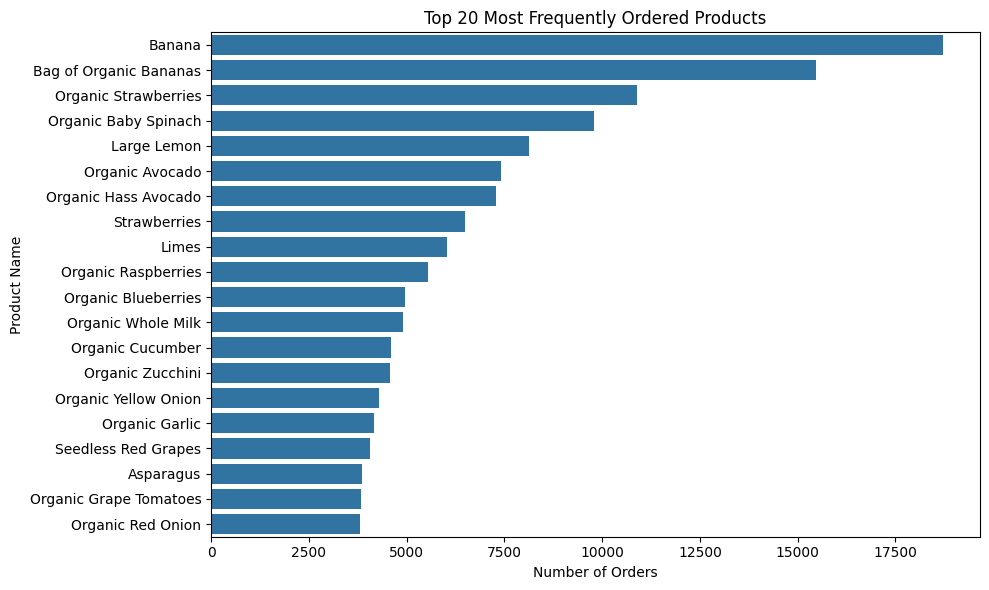

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_20_products,
    x='order_count',
    y='product_name'
)
plt.title("Top 20 Most Frequently Ordered Products")
plt.xlabel("Number of Orders")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


### Insight:
The top 20 most frequently ordered products are primarily daily-use grocery items.
These products should be prioritized for inventory planning and can be featured
prominently on the QuickBasket app to maximize conversions.


In [41]:
dept_order_volume = (
    order_level
    .groupby('department')
    .size()
    .reset_index(name='order_count')
    .sort_values(by='order_count', ascending=False)
)
    

In [42]:
dept_order_volume.head(10)


,department,order_count
19,produce,409087
7,dairy eggs,217051
20,snacks,118862
3,beverages,114046
10,frozen,100426
16,pantry,81242
2,bakery,48394
6,canned goods,46799
8,deli,44291
9,dry goods pasta,38713


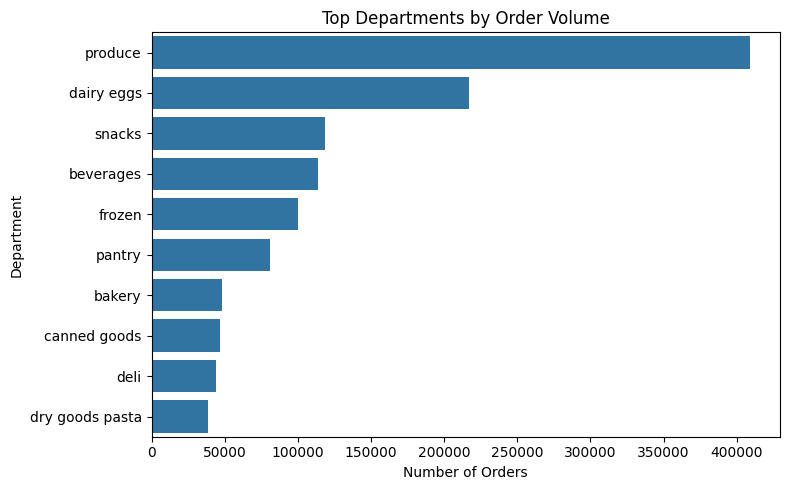

In [43]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=dept_order_volume.head(10),
    x='order_count',
    y='department'
)
plt.title("Top Departments by Order Volume")
plt.xlabel("Number of Orders")
plt.ylabel("Department")
plt.tight_layout()
plt.show()


### Insight:
A small number of departments contribute to a majority of orders.
These high-performing departments should be prioritized for inventory planning
and promotional placement on the QuickBasket platform.


In [44]:
aisle_order_volume = (
    order_level
    .groupby('aisle')
    .size()
    .reset_index(name='order_count')
    .sort_values(by='order_count', ascending=False)
)


In [45]:
aisle_order_volume.head(10)


,aisle,order_count
53,fresh vegetables,150609
50,fresh fruits,150473
98,packaged vegetables fruits,78493
133,yogurt,55240
93,packaged cheese,41699
131,water seltzer sparkling water,36617
83,milk,32644
25,chips pretzels,31269
119,soy lactosefree,26240
11,bread,23635


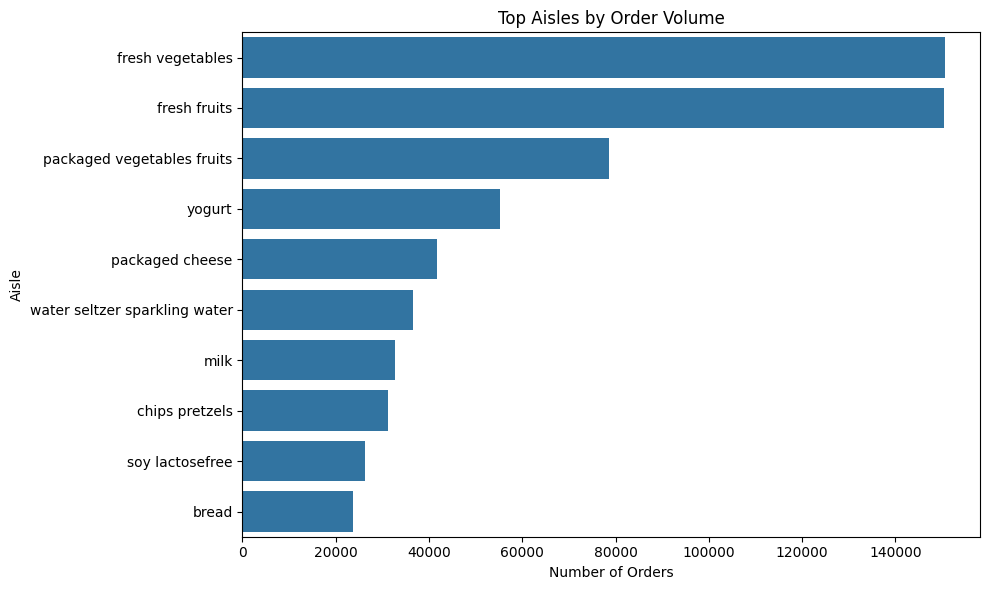

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=aisle_order_volume.head(10),
    x='order_count',
    y='aisle'
)
plt.title("Top Aisles by Order Volume")
plt.xlabel("Number of Orders")
plt.ylabel("Aisle")
plt.tight_layout()
plt.show()


### Insight:
A limited set of aisles accounts for a large share of customer orders.
These aisles are prime candidates for targeted promotions and optimized
product placement within the app and physical inventory planning.


In [47]:
product_reorder_rate = (
    order_level
    .groupby('product_name')['reordered']
    .mean()
    .reset_index(name='reorder_rate')
    .sort_values(by='reorder_rate', ascending=False)
)


In [48]:
product_reorder_rate.head(10)


,product_name,reorder_rate
39111,with Seasoned Roasted Potatoes Scrambled Eggs ...,1.0
29469,Raw Coconut Crystals,1.0
29472,Raw Extra Virgin Coconut Oil,1.0
14570,Green Lentil Rotini With Garlic Herb Sauce,1.0
14576,Green Medium Pitted Olives,1.0
14543,Green Chile Anytime Sauce,1.0
14515,Greek and Chia Nonfat Red Berries Organic Yogurt,1.0
14516,Greek-Style Feta Cheese Stuffed Olives,1.0
4446,Bubble Daily Shower Trig,1.0
20895,"Natural Beverage, Instant, Original, Caffeine ...",1.0


In [49]:
top_10_reordered = product_reorder_rate.head(10)


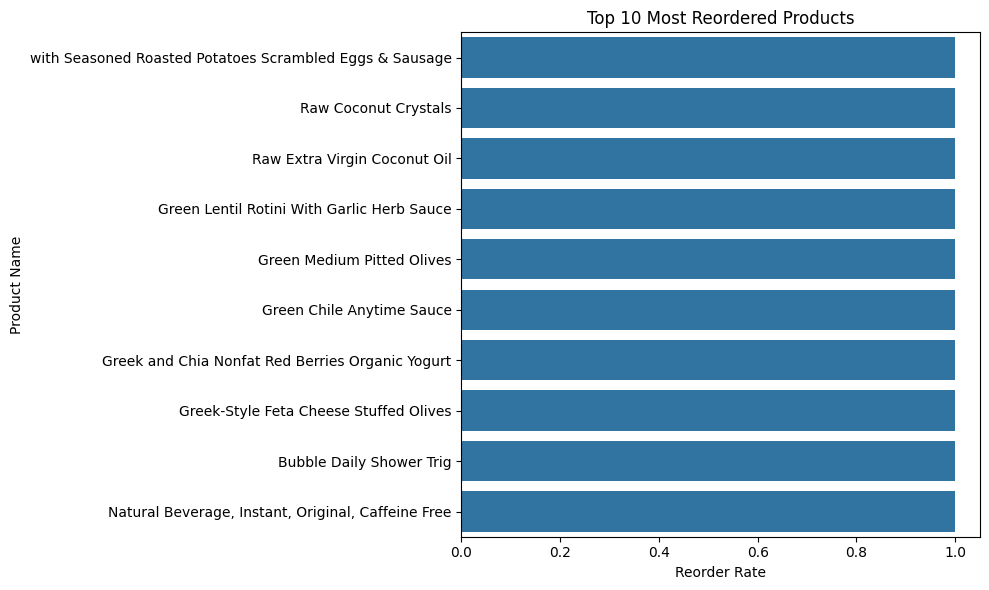

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_reordered,
    x='reorder_rate',
    y='product_name'
)
plt.title("Top 10 Most Reordered Products")
plt.xlabel("Reorder Rate")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


### Insight:
Products with high reorder rates indicate strong customer loyalty and habitual buying behavior.
These products should be prioritized for inventory availability and can be promoted through
repeat-purchase recommendations and subscription offers.


In [51]:
basket_size_per_order = (
    order_items
    .groupby('order_id')
    .size()
    .reset_index(name='items_in_order')
)


In [52]:
basket_size_per_order.head()


,order_id,items_in_order
0,1,8
1,36,8
2,38,9
3,96,7
4,98,49


In [53]:
average_basket_size = basket_size_per_order['items_in_order'].mean()
average_basket_size


np.float64(10.552759338155157)

### Insight:
The average basket size is approximately **10.55 items per order**.
This indicates that customers typically purchase multiple items in a single visit,
making bundle offers and minimum-order-value promotions highly effective.


In [54]:
orders_by_hour = (
    orders
    .groupby('order_hour_of_day')
    .size()
    .reset_index(name='order_count')
)


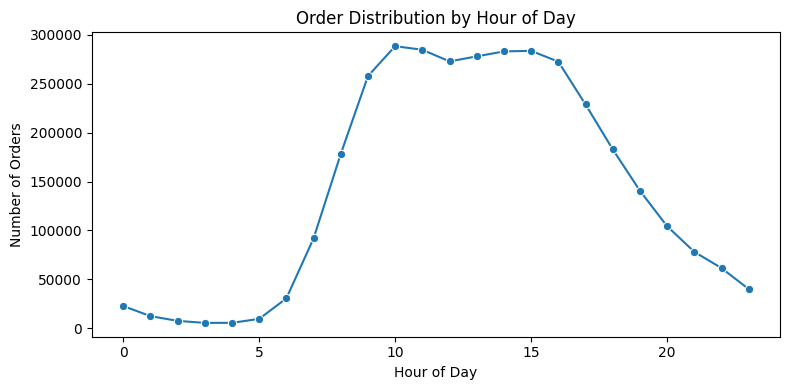

In [55]:
plt.figure(figsize=(8, 4))
sns.lineplot(
    data=orders_by_hour,
    x='order_hour_of_day',
    y='order_count',
    marker='o'
)
plt.title("Order Distribution by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


In [56]:
orders_by_dow = (
    orders
    .groupby('order_dow')
    .size()
    .reset_index(name='order_count')
)


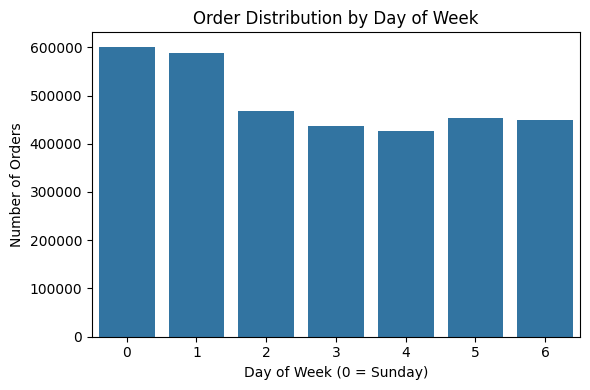

In [57]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=orders_by_dow,
    x='order_dow',
    y='order_count'
)
plt.title("Order Distribution by Day of Week")
plt.xlabel("Day of Week (0 = Sunday)")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


### Insight:
Order volumes vary across the week, with certain days showing significantly higher activity.
These high-demand days are ideal for launching promotions and scheduling marketing campaigns.


In [58]:
days_between_orders = orders['days_since_prior_order'].dropna()


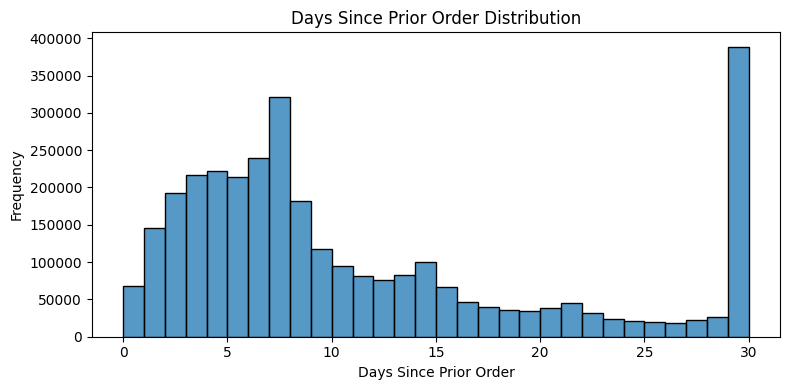

In [59]:
plt.figure(figsize=(8, 4))
sns.histplot(days_between_orders, bins=30)
plt.title("Days Since Prior Order Distribution")
plt.xlabel("Days Since Prior Order")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### Insight:
Most customers place repeat orders within a limited time window,
indicating habitual purchasing behavior. Understanding this reorder
cycle helps in timing reminders, offers, and retention campaigns.


**ASSOCIATION RULE MINING (MARKET BASKET ANALYSIS)**

In [62]:
order_items.columns


Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [64]:
top_products = (
    order_items['product_id']
    .value_counts()
    .head(100)   
    .index
)


In [65]:
filtered_order_items = order_items[
    order_items['product_id'].isin(top_products)
]


In [66]:
filtered_order_items.shape


(314227, 4)

In [67]:
basket = (
    filtered_order_items
    .groupby(['order_id', 'product_id'])
    .size()
    .unstack(fill_value=0)
)


In [69]:
basket = (basket > 0).astype(int)


In [70]:
basket.head()
basket.values.max(), basket.values.min()


(np.int64(1), np.int64(0))

In [71]:
from mlxtend.frequent_patterns import apriori


In [73]:
basket_bool = basket.astype(bool)


In [74]:
frequent_itemsets = apriori(
    basket_bool,
    min_support=0.01,
    use_colnames=True
)


In [75]:
frequent_itemsets.head()


,support,itemsets
0,0.016058,(196)
1,0.040085,(4605)
2,0.043250,(4920)
3,0.015397,(5025)
4,0.024486,(5077)


In [76]:
from mlxtend.frequent_patterns import association_rules


In [77]:
rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.3
)


In [78]:
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(5876),(13176),0.037347,0.164944,0.011369,0.304422,1.845609,1.0,0.005209,1.200521,0.475949,0.059549,0.167029,0.186675
1,(19057),(13176),0.030804,0.164944,0.010368,0.336562,2.040460,1.0,0.005287,1.258679,0.526121,0.055926,0.205516,0.199709
2,(27966),(13176),0.059094,0.164944,0.018966,0.320952,1.945824,1.0,0.009219,1.229745,0.516607,0.092487,0.186823,0.217970
3,(47209),(13176),0.077709,0.164944,0.025786,0.331825,2.011743,1.0,0.012968,1.249756,0.545293,0.118901,0.199844,0.244078
4,(27966),(21137),0.059094,0.116079,0.017794,0.301118,2.594081,1.0,0.010935,1.264764,0.653102,0.113067,0.209339,0.227207


In [79]:
strong_rules = rules[rules['lift'] > 1].sort_values(
    by='lift',
    ascending=False
)


In [80]:
strong_rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,(27966),(21137),0.059094,0.116079,0.017794,0.301118,2.594081,1.0,0.010935,1.264764,0.653102,0.113067,0.209339,0.227207
1,(19057),(13176),0.030804,0.164944,0.010368,0.336562,2.040460,1.0,0.005287,1.258679,0.526121,0.055926,0.205516,0.199709
3,(47209),(13176),0.077709,0.164944,0.025786,0.331825,2.011743,1.0,0.012968,1.249756,0.545293,0.118901,0.199844,0.244078
2,(27966),(13176),0.059094,0.164944,0.018966,0.320952,1.945824,1.0,0.009219,1.229745,0.516607,0.092487,0.186823,0.217970
5,(28204),(24852),0.034704,0.199531,0.012893,0.371508,1.861902,1.0,0.005968,1.273633,0.479558,0.058249,0.214845,0.218062


In [83]:
import os
os.getcwd()


'C:\\Users\\ayush\\OneDrive\\Desktop\\DECODING_THE_BASKET\\notebook'

In [84]:
os.listdir()


['.ipynb_checkpoints', 'customer_segementation_and _basket_analysis.ipynb']

In [86]:
product_catalog = pd.read_csv("../data/product_catalog.csv")


In [87]:
product_catalog.head()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [88]:
product_lookup = product_catalog[['product_id', 'product_name']]


In [90]:
product_lookup.head()


,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [91]:
def map_product_ids(itemset):
    return [
        product_lookup.loc[
            product_lookup['product_id'] == pid,
            'product_name'
        ].values[0]
        for pid in itemset
    ]


In [92]:
strong_rules['antecedents_names'] = strong_rules['antecedents'].apply(map_product_ids)
strong_rules['consequents_names'] = strong_rules['consequents'].apply(map_product_ids)


In [93]:
final_rules = strong_rules[
    [
        'antecedents_names',
        'consequents_names',
        'support',
        'confidence',
        'lift'
    ]
]

final_rules.head(10)


,antecedents_names,consequents_names,support,confidence,lift
4,[Organic Raspberries],[Organic Strawberries],0.017794,0.301118,2.594081
1,[Organic Large Extra Fancy Fuji Apple],[Bag of Organic Bananas],0.010368,0.336562,2.040460
3,[Organic Hass Avocado],[Bag of Organic Bananas],0.025786,0.331825,2.011743
2,[Organic Raspberries],[Bag of Organic Bananas],0.018966,0.320952,1.945824
5,[Organic Fuji Apple],[Banana],0.012893,0.371508,1.861902
0,[Organic Lemon],[Bag of Organic Bananas],0.011369,0.304422,1.845609
6,[Honeycrisp Apple],[Banana],0.013117,0.346663,1.737387


Customers who buy Organic Raspberries are 2.59× more likely to also buy Organic Strawberries compared to random chance.

In [94]:
# Create outputs directory if it doesn't exist
import os
os.makedirs("../outputs/tables", exist_ok=True)

# Export final association rules
final_rules.to_csv(
    "../outputs/tables/association_rules.csv",
    index=False
)

print("association_rules.csv saved successfully")


association_rules.csv saved successfully


In [96]:
order_items.columns


Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [97]:
product_catalog


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [98]:
order_items_named = order_items.merge(
    product_catalog[['product_id', 'product_name']],
    on='product_id',
    how='left'
)

order_items_named.head()


,order_id,product_id,add_to_cart_order,reordered,product_name
0,1,49302,1,1,Bulgarian Yogurt
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese
2,1,10246,3,0,Organic Celery Hearts
3,1,49683,4,0,Cucumber Kirby
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil


In [99]:
top_products_summary = (
    order_items_named
    .groupby(['product_id', 'product_name'])
    .size()
    .reset_index(name='order_count')
    .sort_values(by='order_count', ascending=False)
)

top_products_summary.head()


,product_id,product_name,order_count
19574,24852,Banana,18726
10367,13176,Bag of Organic Bananas,15480
16685,21137,Organic Strawberries,10894
17300,21903,Organic Baby Spinach,9784
37499,47626,Large Lemon,8135


In [100]:
import os

os.makedirs("../outputs/powerbi", exist_ok=True)


In [101]:
top_products_summary.to_csv(
    "../outputs/powerbi/top_products_summary.csv",
    index=False
)


In [102]:
final_rules.to_csv(
    "../outputs/powerbi/association_rules.csv",
    index=False
)


In [103]:
import os
os.path.exists("../outputs/tables/master_order_table.csv")


True

##  1.Business Insights & Recommendations

- Several product combinations show strong affinity, indicating cross-sell opportunities.
- High-lift association rules reveal non-obvious but valuable product pairings.
- Frequently co-purchased items can be bundled to increase average order value.
- Insights from this analysis can support recommendation systems and targeted promotions.


### 2. Cross-Selling Opportunities

- Use association rules to suggest complementary products on product detail pages.
- Implement “Customers also bought” recommendations based on confidence scores.
- Prioritize cross-sell items with high confidence to ensure recommendation relevance.
### 3. Inventory and Shelf Optimization

- Place strongly associated products closer together in physical or digital shelves.
- Use frequent itemsets to forecast demand for commonly purchased product combinations.
- Reduce stock-outs by monitoring high-support product pairs.

### 4. Targeted Promotions

- Design targeted promotions for product pairs with strong association strength.
- Use association rules to optimize discount strategies without hurting margins.
- Run seasonal campaigns using historical basket patterns.


## Limitations

- The analysis is based on historical transaction data and may not capture changing customer preferences.
- Low-support rules, while interesting, may not be actionable at scale.
- The dataset does not include pricing or profitability, so recommendations are frequency-based.
